<a href="https://colab.research.google.com/github/juliana-zh/ML/blob/main/NLP_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Предварительная обработка данных (очистка)

1. Удалить пунктуацию

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punct(text):
    text_nonpunct = "".join([char for char in text if char not in string.punctuation])
    return text_nonpunct

In [ ]:
text = "Россия священная наша держава, Россия священная наша страна!!!( или нет?.. или все-таки да...)"
orig_ru = text
text = remove_punct(text)

text

'Россия священная наша держава Россия священная наша страна или нет или всетаки да'

2. Токенизация

Разобьем на слова:

In [ ]:
import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

text = tokenize(text)
text

['Россия',
 'священная',
 'наша',
 'держава',
 'Россия',
 'священная',
 'наша',
 'страна',
 'или',
 'нет',
 'или',
 'всетаки',
 'да']

3. Удаление стоп-слов

Стоп-слова - это обычные слова, которые, скорее всего, появятся в любом тексте. Они мало говорят нам о наших данных, поэтому мы их удаляем.
NLNK (Natural Language Toolkit) - платформа для создания программ на Python для работы с данными на человеческом языке.

In [ ]:
import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
origin = 'I am dating on sunday with my GF!!!'
eng_txt = origin
eng_txt = remove_punct(eng_txt)
eng_txt = tokenize(eng_txt)
eng_txt = remove_stopwords(eng_txt)
eng_txt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['I', 'dating', 'sunday', 'GF']

4. Стемминг

Стемминг – это процесс приведения слова к его основе или корневому формату. Возьмем пример. Рассмотрим три слова: «разветвленный», «разветвленный» и «ветви». Все они могут быть сокращены до одного слова «ветвь». В конце концов, все три передают одну и ту же идею чего-то, разделяющегося на множество путей или ветвей. Опять же, это помогает уменьшить сложность, сохраняя суть значения, которое несут эти три слова.

In [ ]:
ps = nltk.PorterStemmer()

def stemming(tokenized_text):
    tokenized_text = [ps.stem(word) for word in tokenized_text]
    return tokenized_text

eng_txt_stem = stemming(eng_txt)
eng_txt_stem

['i', 'date', 'sunday', 'gf']

5. Лемматизация

Лемматизация – это процесс преобразования слова в его базовую форму. Разница между стемминг (stemming) и лемматизацией заключается в том, что лемматизация учитывает контекст и преобразует слово в его значимую базовую форму, тогда как стемминг просто удаляет последние несколько символов, что часто приводит к неверному значению и орфографическим ошибкам. Использует подход на основе словаря.

In [ ]:
nltk.download('wordnet')

wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    tokenized_text = [wn.lemmatize(word) for word in tokenized_text]
    return tokenized_text

eng_text_lem = lemmatizing(eng_txt)
eng_text_lem

[nltk_data] Downloading package wordnet to /root/nltk_data...


['I', 'dating', 'sunday', 'GF']

6. Векторизация данных

Векторизация - это процесс кодирования текста в виде целых чисел, то есть числовой формы для создания векторов признаков, чтобы алгоритмы машинного обучения могли понимать наши данные.

In [ ]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

Bag of Words (BoW) - метод, который показывает, есть ли то или иное слово в документе. Мы получаем на выход результат 1, если наше слово присутствует в предложении и 0, если не присутствует.
Алгоритмы машинного обучения не могут напрямую работать с сырым текстом, поэтому его необходимо конвертировать в векторы. Это называется извлечением признаков.
Мешок слов – это техника извлечения признаков, которая описывает объемы вхождения каждого слова в заданный текст.
CountVectorizer - специальный класс для отражения, есть ли то или иное слово в документе.

Алгоритм:
1) Представим, что это наши данные:

I like this movie, it's funny.
I hate this movie.
This was awesome! I like it.
Nice one. I love it.

Разделим по строкам:




In [ ]:
data = ["I like this movie, it's funny.", 'I hate this movie.', 'This was awesome! I like it.', 'Nice one. I love it.']

2) Определяем словарь

Соберем все уникальные слова из 4 загруженных предложений, игнорируя регистр, пунктуацию и односимвольные токены. Это и будет наш словарь (известные слова). Для создания словаря можно использовать класс CountVectorizer из библиотеки sklearn.

3) Создаём векторы документа

Далее, мы должны оценить слова в документе. На этом шаге наша цель – превратить сырой текст в вектор. После этого, мы используем эти наборы как входные данные для модели машинного обучения. Простейший метод оценки – это отметить наличие слов, то есть ставить 1, если есть слово и 0 при его отсутствии.

Теперь мы можем создать мешок слов используя вышеупомянутый класс CountVectorizer.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(data)
print(X_counts.shape)
print(count_vect.get_feature_names_out())
print(X_counts.toarray())

(4, 8)
['awesom' 'funni' 'hate' 'like' 'love' 'movi' 'nice' 'one']
[[0 1 0 1 0 1 0 0]
 [0 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 1 1]]


N-граммы это просто все комбинации смежных слов или букв длины n, которые мы можем найти в нашем исходном тексте. N-граммы с n = 1 называются униграммами. Точно так же можно использовать биграммы (n = 2), триграммы (n = 3)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer(ngram_range=(2,2), analyzer=clean_text)
X_counts = ngram_vect.fit_transform(data)
print(X_counts.shape)
print(ngram_vect.get_feature_names_out())
print(X_counts.toarray())

(4, 8)
['awesom' 'funni' 'hate' 'like' 'love' 'movi' 'nice' 'one']
[[0 1 0 1 0 1 0 0]
 [0 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 1 1]]


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


### TF-IDF (сокращение от term frequency — inverse document frequency)

Является показателем того, насколько слово w является специфичным для конкретного текста. Используется для оценки в поисковых системах, суммирования текста, кластеризации документов.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data)
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names_out())
print(pd.DataFrame(X_tfidf.toarray()))

(4, 8)
['awesom' 'funni' 'hate' 'like' 'love' 'movi' 'nice' 'one']
          0         1         2         3        4         5        6        7
0  0.000000  0.667679  0.000000  0.526405  0.00000  0.526405  0.00000  0.00000
1  0.000000  0.000000  0.785288  0.000000  0.00000  0.619130  0.00000  0.00000
2  0.785288  0.000000  0.000000  0.619130  0.00000  0.000000  0.00000  0.00000
3  0.000000  0.000000  0.000000  0.000000  0.57735  0.000000  0.57735  0.57735


Напомним, что векторизаторы выводят разреженные матрицы.
Разреженная матрица это матрица, в которой большинство значений равно 0.

У частотного скоринга есть проблема: слова с наибольшей частотностью имеют, соответственно, наибольшую оценку. В этих словах может быть не так много информационного выигрыша для модели, как в менее частых словах. Один из способов исправить ситуацию – понижать оценку слова, которое часто встречается во всех схожих документах. Это называется TF-IDF.

Оценка по TF-IDF растет пропорционально частоте появления слова в документе, но это компенсируется количеством документов, содержащих это слово.

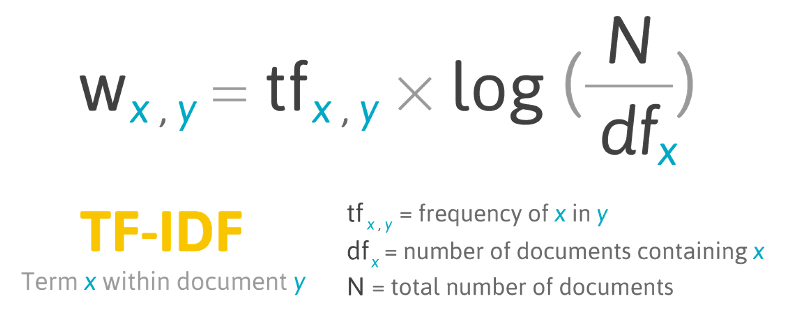

TF_IDF: x в документе y

tf_x_y - частота x в y
df_x - число документов, содержащих х
N - общее количество документов

w_x_y = tf_x_y * log(N / df_x)

### Feature Engineering: создание признаков

Feature Engineering - это процесс использования знаний о предметной области для создания признаков, которые подаются на вход алгоритмам машинного обучения. Это похоже на искусство, поскольку требует знания предметной области и может быть делом трудным. Зато в итоге алгоритм ML может сделать более точный прогноз.